# Irisデータセットの取得

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data.iloc[:, 2:]
X.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


# 標準化

標準化は、個々の特徴の平均を $0$ , 分散を $1$ にすることで、学習データを構成する個々の特徴の測定単位の影響を取り除くことができます。標準化するとデータの中心が原点に移動します（中心化）。  

#### 標準化する手順
$1.$ データ $x$ の平均 $\mu$ , 標準偏差 $\sigma$ を求める  
$2.$ データ $x$ を $z = \frac{x - \mu}{\sigma}$ で線形変換する
  
つまり、標準化とは元のデータの平均と標準偏差を用いて $z$ のような式を用いて線形変換することをいいます。

In [2]:
def standardize(X):
    """標準化する.
    
    X: データセット
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


X_std = standardize(X)
X_std.head(3)

,petal length (cm),petal width (cm)
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977


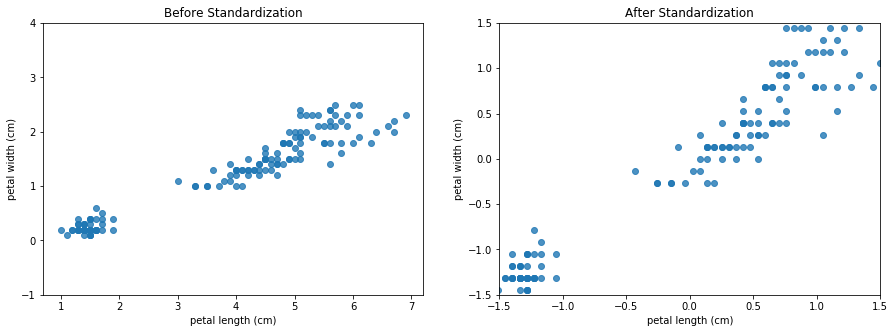

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=.8)
ax.set_title('Before Standardization')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_ylim(-1, 4)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], alpha=.8)
ax.set_title('After Standardization')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.show()

# 無相関化

観測データの特徴間から相関を無くす処理を無相関化といいます。  

#### 無相関化する手順
$1.$ データ $x$ の共分散行列 $\Sigma$ を求める  
$2.$ 求めた共分散行列 $\Sigma$ から固有値、固有ベクトルを取得する  
$3.$ 固有値ベクトルを並べた行列 $S$ (回転行列) を定義する  
$4.$ 回転行列 $S$ を用いてデータ $x$ を線形変換する

In [4]:
# 共分散行列を求める
Sigma = np.cov(X, rowvar=0)

# 共分散行列から固有値、固有ベクトルを取得
eigenvalue, eigenvector = np.linalg.eig(Sigma)

# 固有値ベクトルを並べて回転行列Sを定義する
S = eigenvector

# 回転行列Sを使ってデータを線形変換する
y = np.dot(S.T, X.T).T

#### 参考  
共分散行列 $\Sigma$ を回転行列 $S$ で対角化したものを対角行列 $\Lambda$ とします。この対角行列 $\Lambda$ の分散は、各固有ベクトル方向に対応する固有値になります。また、共分散は $0$ になるので、これを観測データの無相関化といいます。

In [5]:
# 共分散行列を対角化する
Lambda = np.dot(np.dot(S.T, Sigma), S)

# 分散が固有値、共分散が0になっていることを確認する
print('固有値:', eigenvalue)
print('対角行列:\n', Lambda)

固有値: [3.65937449 0.03621925]
対角行列:
 [[3.65937449e+00 0.00000000e+00]
 [6.24500451e-17 3.62192472e-02]]


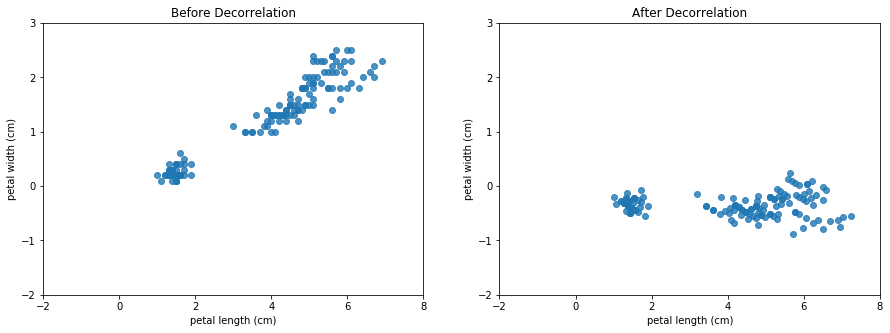

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=.8)
ax.set_title('Before Decorrelation')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-2, 3))

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y[:, 0], y[:, 1], alpha=.8)
ax.set_title('After Decorrelation')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-2, 3))

plt.show()

# 白色化

共分散行列 $\Sigma$ を対角化することで特徴間の相関はなくなりますが、固有値相当分、特徴量の標準偏差に違いが残ります。この違いをなくして、すべての特徴量の標準偏差を $1$ に正規化し、かつ、中心化を行う操作を白色化（whitening）といいます。
これは、無相関化した結果を標準化したようなイメージです。 つまり、白色化するとデータは各次元間の相関がなくなった上に平均が $0$ で標準偏差が $1$ になります。

#### 白色化する手順
$1.$ データを中心化する（平均を $0$ にする）  
$2.$ データ $x$ の共分散行列 $\Sigma$ を求める  
$3.$ 求めた共分散行列 $\Sigma$ から固有値、固有ベクトルを取得する  
$4.$ 固有値ベクトルを並べた行列 $S$ (回転行列) を定義する  
$5.$ 共分散行列 $\Sigma$ を回転行列 $S$ で対角化し、対角行列 $\Lambda$ を求める  
$6.$ 対角行列 $\Lambda$ の逆行列の平方根 $\Lambda^{-\frac{1}{2}}$ 、回転行列 $S$ 、中心化したデータの内積を求める

In [7]:
# データを中心化する
X_centerized = X - X.mean(axis=0)

# 共分散行列を求める
Sigma = np.cov(X, rowvar=0)

# 共分散行列から固有値、固有ベクトルを取得
eigenvalue, eigenvector = np.linalg.eig(Sigma)

# 固有値ベクトルを並べて回転行列Sを定義する
S = eigenvector

# 対角行列を求める
Lambda = np.dot(np.dot(np.linalg.inv(S), Sigma), S)

# 対角行列の逆行列の平方根を計算する
Lambda_sqrt_inv = np.linalg.inv(np.sqrt(Lambda))

# 対角行列の逆行列の平方根、回転行列、中心化したデータの内積を求める
u = np.dot(np.dot(X_centerized, S), Lambda_sqrt_inv.T)

#### 参考  
$u$ の共分散行列は単位行列になります。

In [8]:
# 白色化後の共分散行列
u_cov = np.cov(u, rowvar=0)
print('白色化後の共分散行列:', u_cov)

白色化後の共分散行列: [[ 1.00000000e+00 -3.07427529e-08]
 [-3.07427529e-08  1.00000000e+00]]


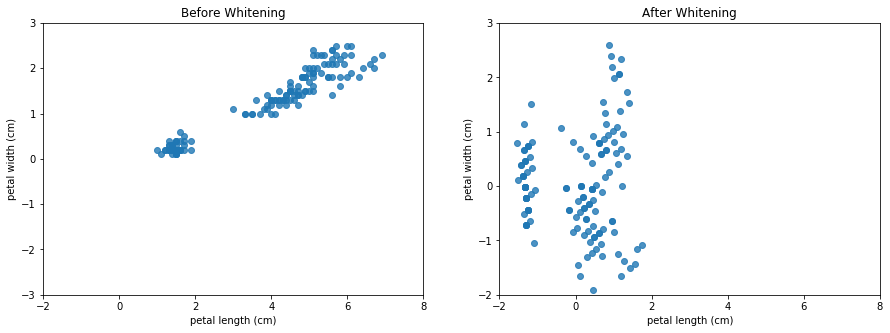

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=.8)
ax.set_title('Before Whitening')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-3, 3))

ax = fig.add_subplot(1, 2, 2)
ax.scatter(u[:, 0], u[:, 1], alpha=.8)
ax.set_title('After Whitening')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-2, 3))

plt.show()